In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
from torchvision import transforms
from torch.autograd import Variable

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# folder_names = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069','070','071','072','073','074','075','076','077','078','079','080','081','082','083','084','085','086','087','088','089','090','091','092','093','094','095','096','097','098','099','100',
# '101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200']
folder_names = ['001','002','003','004']

In [0]:
temporary_image = Image.open('./drive/My Drive/signature data/folder1/c-001-02.jpg')

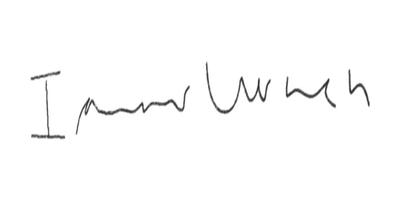

In [7]:
temporary_image

In [0]:
class ff_nn(nn.Module):
    def __init__(self):
        super(ff_nn,self).__init__()
        self.fc1 = nn.Linear(400*200,100)
        self.fc2 = nn.Linear(100,2)
        
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x # is not required you can directly use cross_entropy loss

In [0]:
class MyDataset(Dataset):
    def __init__(self,root = './drive/My Drive/signature data/folder1',transform = None):
        self.root = root
        self.files = os.listdir(root)
        self.transform = transform
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self,index):
        self.file_name = self.files[index]
        self.file_path = os.path.join(self.root,self.file_name)
        self.target = 0
        if(self.file_name[:2] == 'cf'):
            self.target = 0
        else:
            self.target = 1
        image = Image.open(self.file_path)
        scaler = StandardScaler();
        image = scaler.fit_transform(image);
        image = self.transform(image)
        self.target = torch.tensor(self.target)
        return (image,self.target)
    
    # you could try return target -1 if its a .mat file and if target == -1 then do not consider it.

Following piece of code is for printing a scaled image

In [0]:
# train_dataset = MyDataset('./drive/My Drive/signature data/folder{}/'.format(i),transforms.ToTensor())
# image, target = train_dataset.__getitem__(600)
# image = np.array(image).reshape(200,400)
# # image.shape
# # print(image[80:100,160:200])
# image = Image.fromarray(image)
# plt.figure(figsize=(8,8))
# plt.imshow(image)

In [0]:
model = ff_nn()
optimizer = optim.SGD(model.parameters(),lr = 0.1, momentum = 0.9)
loss_function = nn.CrossEntropyLoss()

Following code is for backpropagating 30 times from each folder individually

In [0]:
epochs = 30
fc2Wts = []
for i in range(1,50):
#     train_dataset = MyDataset('./drive/My Drive/Untitled folder/signature/{}/'.format(folder),transforms.ToTensor())
    train_dataset = MyDataset('./drive/My Drive/signature data/folder{}/'.format(i),transforms.ToTensor())
#     image, target = train_dataset.__getitem__(0)
    train_loader = DataLoader(train_dataset,batch_size=64,shuffle = True,num_workers = 6)
    
    loss = 0
    epoch_loss = 0.0
    for epoch in tqdm_notebook(range(epochs)):
        for _,(image,label) in enumerate(train_loader):
            image = Variable(image)
            label = Variable(label)
            image = image.view(-1,400*200)
            
            optimizer.zero_grad()
            model = model.double() # This has been used because Torch by default considers float Tensors but our tensors are double so we change the model to double tensors
            output = model(image)   # output gives the probability distribution over the variables
            loss = loss_function(output,label)
#             final_output = output.data.max(1)[1]
#             correct += final_output.eq(label.data).sum()
            loss.backward()
            optimizer.step()
            
            epoch_loss += output.shape[0] * loss.item()
#             print(epoch_loss)
#             fc2Wts.append(list(model.fc2.parameters())[1])
#         print(list(model.fc2.parameters())[1])
        
#         print('Loss = ',loss/54)
    
#     plt.imshow(image)
#     plt.show()
#     DataLoader(train_dataset,batch_size=54,shuffle = True,num_workers = 8)

Following code is for backpropagting 30 time from all folders

In [0]:
def plot_graph(loss_list):
    epoch_list = list(i for i in range(len(loss_list)))
    plt.plot(epoch_list,loss_list,'-')

the following code is printing loss of each folder 30 times(epochs). Also printing loss after each epoch

loss epoch 1 :  0.2102614931775107
loss epoch 1 :  0.39206256650292176
loss epoch 1 :  0.5595421623847928
loss epoch 1 :  0.7849397975138498
loss epoch 1 :  0.9934165845169236
loss epoch 1 :  1.1372680621155846
loss epoch 1 :  1.3974141468346941
loss epoch 1 :  1.6282341138072687
loss epoch 1 :  1.8050876679224115


loss epoch 2 :  0.22092724667686173
loss epoch 2 :  0.3961832378709927
loss epoch 2 :  0.5667746398934168
loss epoch 2 :  0.7815701076193466
loss epoch 2 :  0.995963215790003
loss epoch 2 :  1.1229644331694095
loss epoch 2 :  1.3509000325360494
loss epoch 2 :  1.5571206918770428
loss epoch 2 :  1.7030979982039842


loss epoch 3 :  0.1855188828747539
loss epoch 3 :  0.34435496022144746
loss epoch 3 :  0.5048975549509485
loss epoch 3 :  0.6966295383941404
loss epoch 3 :  0.8789573586045798
loss epoch 3 :  0.9913628799390374
loss epoch 3 :  1.1983840229773384
loss epoch 3 :  1.371749939850947
loss epoch 3 :  1.4979341119445293


loss epoch 4 :  0.17556699180380378
loss epoch 4 :  0.3234152989559675
loss epoch 4 :  0.47571193476081025
loss epoch 4 :  0.6413303277533984
loss epoch 4 :  0.7980840153089047
loss epoch 4 :  0.9073182706950598
loss epoch 4 :  1.1122896055696156
loss epoch 4 :  1.2756093666093085
loss epoch 4 :  1.3855582822342056


loss epoch 5 :  0.14969359408654184
loss epoch 5 :  0.2793787031935132
loss epoch 5 :  0.4224132702303577
loss epoch 5 :  0.5655142575114591
loss epoch 5 :  0.7076571323234272
loss epoch 5 :  0.794863765358101
loss epoch 5 :  0.9799781957205527
loss epoch 5 :  1.1214350391656749
loss epoch 5 :  1.2436119202158844


loss epoch 6 :  0.17535220544981225
loss epoch 6 :  0.2906410461305103
loss epoch 6 :  0.42637033488586773
loss epoch 6 :  0.5700963169968057
loss epoch 6 :  0.6873724617296044
loss epoch 6 :  0.7816402489832875
loss epoch 6 :  0.9578888564426189
loss epoch 6 :  1.086874490424047
loss epoch 6 :  1.2027401629760992


loss epoch 7 :  0.15692827297786244
loss epoch 7 :  0.26734129159961934
loss epoch 7 :  0.38001878869363903
loss epoch 7 :  0.506203962503458
loss epoch 7 :  0.6390359947964059
loss epoch 7 :  0.7182343631296112
loss epoch 7 :  0.8915818020463495
loss epoch 7 :  1.0268910327138103
loss epoch 7 :  1.1335074812565094


loss epoch 8 :  0.11325240950054702
loss epoch 8 :  0.21173124190026632
loss epoch 8 :  0.32188278519296043
loss epoch 8 :  0.44554294305073444
loss epoch 8 :  0.559301147916799
loss epoch 8 :  0.6422595145420374
loss epoch 8 :  0.8056845034034553
loss epoch 8 :  0.9259181909712343
loss epoch 8 :  1.0024516518902447


loss epoch 9 :  0.10280798550606933
loss epoch 9 :  0.18645484135044066
loss epoch 9 :  0.28548478230912666
loss epoch 9 :  0.3957285418460639
loss epoch 9 :  0.4764014850829563
loss epoch 9 :  0.5539920582866306
loss epoch 9 :  0.6960338998096647
loss epoch 9 :  0.7894344286392851
loss epoch 9 :  0.8626692079703447


loss epoch 10 :  0.09555790050022317
loss epoch 10 :  0.16229694207168105
loss epoch 10 :  0.2623489864521132
loss epoch 10 :  0.37125693425149875
loss epoch 10 :  0.45297985312733663
loss epoch 10 :  0.5311125083065369
loss epoch 10 :  0.6826143404773783
loss epoch 10 :  0.7823102662140187
loss epoch 10 :  0.8577586557675545


loss epoch 11 :  0.12961083493913625
loss epoch 11 :  0.20275455942706336
loss epoch 11 :  0.2910890523608188
loss epoch 11 :  0.38283092731366875
loss epoch 11 :  0.45879719781977696
loss epoch 11 :  0.5277762866873433
loss epoch 11 :  0.6666406758063066
loss epoch 11 :  0.7420929981641324
loss epoch 11 :  0.7958900442682952


loss epoch 12 :  0.09158216692225855
loss epoch 12 :  0.16810880669343603
loss epoch 12 :  0.24607520665655389
loss epoch 12 :  0.3263225826393543
loss epoch 12 :  0.4086403612361684
loss epoch 12 :  0.46948468467861826
loss epoch 12 :  0.5836194306766088
loss epoch 12 :  0.6655776819434377
loss epoch 12 :  0.7284848160852813


loss epoch 13 :  0.08004424263868454
loss epoch 13 :  0.1512624355406507
loss epoch 13 :  0.23073639487503034
loss epoch 13 :  0.31342142832143555
loss epoch 13 :  0.37874616987354237
loss epoch 13 :  0.43924995429307606
loss epoch 13 :  0.549750698409046
loss epoch 13 :  0.6214887128205091
loss epoch 13 :  0.6896136602998464


loss epoch 14 :  0.07407553068242075
loss epoch 14 :  0.11434889820847614
loss epoch 14 :  0.18066058409479863
loss epoch 14 :  0.24315722844764795
loss epoch 14 :  0.299830982479182
loss epoch 14 :  0.34829010949907263
loss epoch 14 :  0.45676842951641994
loss epoch 14 :  0.5398668565251443
loss epoch 14 :  0.6084961568598793


loss epoch 15 :  0.08926652935029257
loss epoch 15 :  0.14934334693237322
loss epoch 15 :  0.20968696005489348
loss epoch 15 :  0.28409899432595265
loss epoch 15 :  0.33966274736428526
loss epoch 15 :  0.39852257524417184
loss epoch 15 :  0.4969942002321692
loss epoch 15 :  0.5927841808960392
loss epoch 15 :  0.648295337185417


loss epoch 16 :  0.07415141837576888
loss epoch 16 :  0.12127692610632153
loss epoch 16 :  0.1726582234994798
loss epoch 16 :  0.253095643219383
loss epoch 16 :  0.30057442052119476
loss epoch 16 :  0.34211699427492204
loss epoch 16 :  0.4302109511423416
loss epoch 16 :  0.5122888048007677
loss epoch 16 :  0.5631119876417673


loss epoch 17 :  0.07429769503589723
loss epoch 17 :  0.11846653476389614
loss epoch 17 :  0.17913523664613512
loss epoch 17 :  0.23602730076721168
loss epoch 17 :  0.281674343802907
loss epoch 17 :  0.33365860263650177
loss epoch 17 :  0.41719131496020906
loss epoch 17 :  0.48759937084411387
loss epoch 17 :  0.5327515132933762


loss epoch 18 :  0.05897384350892066
loss epoch 18 :  0.09552833419731176
loss epoch 18 :  0.15106211387437893
loss epoch 18 :  0.21513078907627134
loss epoch 18 :  0.2572307155973698
loss epoch 18 :  0.2971903959788446
loss epoch 18 :  0.370505238548668
loss epoch 18 :  0.43255073472934114
loss epoch 18 :  0.4750908679810211


loss epoch 19 :  0.06500973651436637
loss epoch 19 :  0.1053732655712776
loss epoch 19 :  0.15644318164735838
loss epoch 19 :  0.2163796911604386
loss epoch 19 :  0.2648568376590752
loss epoch 19 :  0.2976452626043843
loss epoch 19 :  0.3591754192600878
loss epoch 19 :  0.42761121838918387
loss epoch 19 :  0.470933829798257


loss epoch 20 :  0.0694936553105471
loss epoch 20 :  0.10651267117778361
loss epoch 20 :  0.15704190535884885
loss epoch 20 :  0.20762809130317705
loss epoch 20 :  0.2502084009111664
loss epoch 20 :  0.2782055489426341
loss epoch 20 :  0.33269099070798397
loss epoch 20 :  0.39026427881555587
loss epoch 20 :  0.42955366354859625


loss epoch 21 :  0.05486059689525131
loss epoch 21 :  0.08448292994866317
loss epoch 21 :  0.1291882299693801
loss epoch 21 :  0.17689956630211054
loss epoch 21 :  0.21810799776986578
loss epoch 21 :  0.25769637988890537
loss epoch 21 :  0.31502686946730496
loss epoch 21 :  0.3875986401471078
loss epoch 21 :  0.431957791682791


loss epoch 22 :  0.06848028475029841
loss epoch 22 :  0.10547838557447871
loss epoch 22 :  0.15263275712311236
loss epoch 22 :  0.20655492264082415
loss epoch 22 :  0.2541819864511368
loss epoch 22 :  0.29033205006209506
loss epoch 22 :  0.3544663468455421
loss epoch 22 :  0.41044197297569834
loss epoch 22 :  0.4490338258720764


loss epoch 23 :  0.05414282806421269
loss epoch 23 :  0.07860175007513831
loss epoch 23 :  0.1122546527484537
loss epoch 23 :  0.15598916700793264
loss epoch 23 :  0.18543038294321296
loss epoch 23 :  0.21025495323523444
loss epoch 23 :  0.25729493488729105
loss epoch 23 :  0.3033451021567062
loss epoch 23 :  0.3386126034649019


loss epoch 24 :  0.04556044951061717
loss epoch 24 :  0.06772817905356325
loss epoch 24 :  0.09562552534947495
loss epoch 24 :  0.1313347892984871
loss epoch 24 :  0.15742130574166263
loss epoch 24 :  0.17665383068604804
loss epoch 24 :  0.22378631306334387
loss epoch 24 :  0.26276131028090555
loss epoch 24 :  0.2891539090497206


loss epoch 25 :  0.04269779775585026
loss epoch 25 :  0.06274618618695067
loss epoch 25 :  0.08816508665394875
loss epoch 25 :  0.12333092568378624
loss epoch 25 :  0.14917051488157707
loss epoch 25 :  0.16594667497543883
loss epoch 25 :  0.20592652791578797
loss epoch 25 :  0.24197137631009982
loss epoch 25 :  0.2704582425783012


loss epoch 26 :  0.039834267658605566
loss epoch 26 :  0.058667591689755064
loss epoch 26 :  0.08420184727134276
loss epoch 26 :  0.11716656187735837
loss epoch 26 :  0.13848832480209472
loss epoch 26 :  0.15292080553168114
loss epoch 26 :  0.18789793625974213
loss epoch 26 :  0.2206044151629882
loss epoch 26 :  0.24162645467682586


loss epoch 27 :  0.03735881539534082
loss epoch 27 :  0.057642735805036496
loss epoch 27 :  0.07927650718590935
loss epoch 27 :  0.11351686556888163
loss epoch 27 :  0.13799525315847003
loss epoch 27 :  0.15673963753460474
loss epoch 27 :  0.19325962347839162
loss epoch 27 :  0.22887189013180959
loss epoch 27 :  0.24879974674531719


loss epoch 28 :  0.03410785282070016
loss epoch 28 :  0.05258760521851479
loss epoch 28 :  0.07266010247954306
loss epoch 28 :  0.10604699957117687
loss epoch 28 :  0.13135066606141627
loss epoch 28 :  0.14897124088456615
loss epoch 28 :  0.18261040580685864
loss epoch 28 :  0.2175744680326139
loss epoch 28 :  0.23711901332837448


loss epoch 29 :  0.0346761058128101
loss epoch 29 :  0.05389791708861866
loss epoch 29 :  0.07272393138092081
loss epoch 29 :  0.10502383007191912
loss epoch 29 :  0.12479723585104627
loss epoch 29 :  0.13973601893708965
loss epoch 29 :  0.17261579771202973
loss epoch 29 :  0.203886578990808
loss epoch 29 :  0.22205553702909797


loss epoch 30 :  0.03215699096113797
loss epoch 30 :  0.04987582465742372
loss epoch 30 :  0.0679825417142966
loss epoch 30 :  0.09850793779988047
loss epoch 30 :  0.11653135856213095
loss epoch 30 :  0.13018801882543202
loss epoch 30 :  0.16419854996973582
loss epoch 30 :  0.19474460425619478
loss epoch 30 :  0.21723602684091717


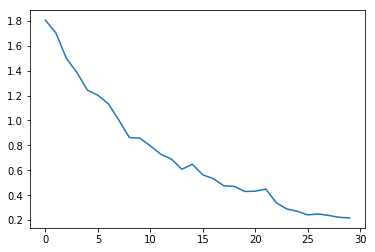

In [40]:
loss = 0
epochs = 30
loss_list = []
for epoch in range(epochs):
    epoch_loss = 0.0
    total_dataset_length = 0;
    for i in tqdm_notebook(range(1,10)):
        train_dataset = MyDataset('./drive/My Drive/signature data/folder{}/'.format(i),transforms.ToTensor())
        train_loader = DataLoader(train_dataset,batch_size=64,shuffle = True,num_workers = 6)
        for _,(image,label) in enumerate(train_loader):
            image = Variable(image)
            label = Variable(label)
            image = image.view(-1,400*200)

            optimizer.zero_grad()
            model = model.double() # This has been used because Torch by default considers float Tensors but our tensors are double so we change the model to double tensors
            output = model(image)   # output gives the probability distribution over the variables
            loss = loss_function(output,label)
#             final_output = output.data.max(1)[1]
#             correct += final_output.eq(label.data).sum()
            loss.backward()
            optimizer.step()

            epoch_loss += output.shape[0] * loss.item()
            total_dataset_length += len(train_dataset);
        print('loss epoch {} : '.format(epoch+1),epoch_loss/len(train_dataset))
    loss_list.append(epoch_loss/len(train_dataset));

plot_graph(loss_list)

In [0]:
for i in fc2Wts:
    print(i)

In [0]:
temp = model.fc2.parameters()
fc2Wt = []
for wts in temp:
    fc2Wt.append(wts.data)

In [0]:
list(model.fc2.parameters())[0]

following is the test accuracy on each of the 10 folders

In [41]:

fc2Wts = []
for i in range(1,10):
    train_dataset = MyDataset('./drive/My Drive/signature data/Tfolder{}/'.format(i),transforms.ToTensor())
#     image, target = train_dataset.__getitem__(0)
    train_loader = DataLoader(train_dataset,batch_size=64,shuffle = True,num_workers = 6)
    
    testLoss = 0.0
    correct = 0
    
#     for epoch in tqdm_notebook(range(epochs)):
    for _,(image,label) in enumerate(train_loader):
        image = Variable(image)
        label = Variable(label)
        image = image.view(-1,400*200)

        predictedOutput = model(image)
#         print(predictedOutput)
        testLoss += loss_function(predictedOutput,label)

        predictedDigit = predictedOutput.data.max(1)[1]
#         print(predictedDigit)
        correct += predictedDigit.eq(label.data).sum()
        
#         print('Loss = ',loss/54)
    
    print('correct : ', correct)
    print('len : ', len(train_loader.dataset))
    print('Accuracy : ',100 * correct/len(train_loader.dataset))
#     plt.imshow(image)
#     plt.show()
#     DataLoader(train_dataset,batch_size=54,shuffle = True,num_workers = 8)

correct :  tensor(90)
len :  160
Accuracy :  tensor(56)
correct :  tensor(109)
len :  170
Accuracy :  tensor(64)
correct :  tensor(106)
len :  170
Accuracy :  tensor(62)
correct :  tensor(108)
len :  170
Accuracy :  tensor(63)
correct :  tensor(106)
len :  170
Accuracy :  tensor(62)
correct :  tensor(106)
len :  170
Accuracy :  tensor(62)
correct :  tensor(100)
len :  170
Accuracy :  tensor(58)
correct :  tensor(104)
len :  170
Accuracy :  tensor(61)
correct :  tensor(100)
len :  170
Accuracy :  tensor(58)
